## import tensorflow

In [1]:
import tensorflow as tf
import time

## 測試 (預設 GPU)

In [2]:
size = 500

# 建立 W/X 矩陣，shape 為 [size,size]
W = tf.random_normal([size,size], name='W')
X = tf.random_normal([size,size], name='X')

# 矩陣相乘
mul = tf.matmul(W, X, name='mul')

# 將矩陣的值做加總
sum_result = tf.reduce_sum(mul, name='sum')

# 建立 Session 組態設定
tfconfig = tf.ConfigProto(log_device_placement=True)

# 執行計算圖
with tf.Session() as sess:
    result = sess.run(sum_result)
print(f'Result = {result}')


Result = -468.247314453125


## 使用 CPU

In [3]:
size = 500
with tf.device('/cpu:0'):
    W = tf.random_normal([size,size], name='W')
    X = tf.random_normal([size,size], name='X')
    mul = tf.matmul(W, X, name='mul')
    sum_result = tf.reduce_sum(mul, name='sum')


tfconfig = tf.ConfigProto(log_device_placement=True)
with tf.Session() as sess:
    result = sess.run(sum_result)
print(f'Result = {result}')

Result = 11789.74609375


## 使用GPU

In [4]:
size = 500
with tf.device('/gpu:0'):
    W = tf.random_normal([size,size], name='W')
    X = tf.random_normal([size,size], name='X')
    mul = tf.matmul(W, X, name='mul')
    sum_result = tf.reduce_sum(mul, name='sum')


tfconfig = tf.ConfigProto(log_device_placement=True)
with tf.Session() as sess:
    result = sess.run(sum_result)
print(f'Result = {result}')

Result = -906.57177734375


## 比較 GPU /  CPU 效能

In [5]:
import tensorflow as tf
import time as time

def perform_test(device, size):
    with tf.device(device):
        W = tf.random_normal([size,size], name='W')
        X = tf.random_normal([size,size], name='X')
        mul = tf.matmul(W, X, name='mul')
        sum_result = tf.reduce_sum(mul, name='sum')
    
    start_time = time.time()
    tfconfig = tf.ConfigProto(log_device_placement=True)
    with tf.Session() as sess:
        result = sess.run(sum_result)
        
    take_time = time.time() - start_time
    print(f'device : {device} ; size : {size} ; time : {take_time}')
    
    return take_time

In [6]:
g = perform_test('/gpu:0',1000)
c = perform_test('/cpu:0',1000)

device : /gpu:0 ; size : 1000 ; time : 0.07903528213500977
device : /cpu:0 ; size : 1000 ; time : 0.1186830997467041


## 繪圖測試

device : /cpu:0 ; size : 0 ; time : 0.07148027420043945
device : /gpu:0 ; size : 0 ; time : 0.07914304733276367
device : /cpu:0 ; size : 1000 ; time : 0.1365981101989746
device : /gpu:0 ; size : 1000 ; time : 0.0797581672668457
device : /cpu:0 ; size : 2000 ; time : 0.36603355407714844
device : /gpu:0 ; size : 2000 ; time : 0.09347033500671387
device : /cpu:0 ; size : 3000 ; time : 1.045750617980957
device : /gpu:0 ; size : 3000 ; time : 0.12840771675109863
device : /cpu:0 ; size : 4000 ; time : 1.9819138050079346
device : /gpu:0 ; size : 4000 ; time : 0.20162343978881836
device : /cpu:0 ; size : 5000 ; time : 3.453108310699463
device : /gpu:0 ; size : 5000 ; time : 0.31768035888671875
device : /cpu:0 ; size : 6000 ; time : 5.525491952896118
device : /gpu:0 ; size : 6000 ; time : 0.5081019401550293


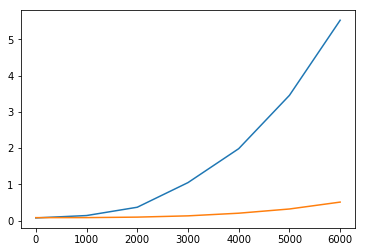

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
i_list=[]; cpu_list=[]; gpu_list=[];

for i in range(0,6001,1000):
    i_list.append(i)
    cpu_list.append(perform_test('/cpu:0',i))
    gpu_list.append(perform_test('/gpu:0',i))
    

plt.plot(i_list, cpu_list, label='cpu')
plt.plot(i_list, gpu_list, label='gpu')
plt.show()